### ST445 Managing and Visualizing Data
# Working with APIs and Social Media Data
### Week 5 Lecture, MT 2017 - Kenneth Benoit, Dr. Akitaka Matsuo

## Plan for today

-  APIs
-  API Examples
-  Using the Twitter API
-  Working with text

## HTTP requests


To make a valid request, the client needs to include four things:

1.  URL (Uniform Resource Locator)
2.  Method: the request "verb"
3.  List of Headers
    -  meta-information about a request
    -  a simple list of items, such as the date-time of the client request, size of the request body, etc.
4.  Body: The data tyhe client wants to send the server


## structure of an http request

![http request](figs/http-request-structure.gif)

## structure of an http request

![http request](figs/http-request.gif)

## API verbs

- `GET` - Asks the server to retrieve a resource
- `POST` - Asks the server to create a new resource
- `PUT` - Asks the server to edit/update an existing resource
- `DELETE` - Asks the server to delete a resource

## structure of an http response

![http request](figs/http-response-structure.gif)

## Example: 404 Status Message

[![404 message](figs/github404.png)](https://github.com/404)

## curl

*  a general tool to transfer data from or to a server, using one of the application protocols (from last week)
*  Originally: "see URL"
*  has a ton of options
*  a good command-line tool for using APIs

```bash
KBMacBook:~ kbenoit$ curl www.example.com

<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }

[...]
```

## REST APIs

* Representational state transfer (REST)
* "allow requesting systems to access and manipulate textual representations of Web resources using a uniform and predefined set of stateless operations"
* _stateless_ means that the communication retains no informatio by either sender or receiver; there is no receipt acknowledged by receiver to the sender
* HTTP is a stateless protocol
* standard APIs are stateless

## Examples of commercial data providers' APIs

- [Crowdflower](https://success.crowdflower.com/hc/en-us/articles/202703425-CrowdFlower-API-Requests-Guide)
- [Facebook](https://developers.facebook.com/docs/)
- [LinkedIn](https://developer.linkedin.com/docs/rest-api#)
- [Twitter](https://developer.twitter.com/en/docs)
- [Instagram](https://www.instagram.com/developer/)
- [OpenWeather](https://openweathermap.org/api)
- [GitHub](https://developer.github.com/v3/repos/contents/)
- [Yelp](https://www.yelp.com/developers/documentation/v3)


## Twitter API

### The Twitter API can be a powerful tool for your research. Because:

1. Free
2. Easy to access
3. Vast amount of data 
    - e.g. more than 20M brexit tweets, especially more than 5M tweets are generated on 23rd June, 2016
    


## Requirement to use Twitter API

1. Twitter account (of course it's free)
2. Programming environment (python or R)
3. Stable internet connection (if you stream tweets)
4. Database solution (DB? flat text?)

## Open Twitter accounts

- It's recommended to have a separate account for twitter scraping
- You can open a twitter account using a free email account (e.g. Gmail)
    https://twitter.com/signup

![signup_twitter](figs/twitter_signup.png)



## Create an Twitter app

- You can get the API access keys and tokens by registering a web-app for Twitter
- Go to the apps page
    https://apps.twitter.com/
- Create New App

![signup_twitter](figs/apps_register.png)



## Get keys and tokens

- Go to "Keys and Access Tokens" page of the app you've just register
- Generate tokens
- Get 4 pieces of information and store them securely
    - Consumer Key, Consumer Secret, Access Token, Access Token Secret
    - Make sure that everything is copied precisely (nothing left out, no additional space)

![signup_twitter](figs/keys_tokens.png)



## Authentication

*  The keys used on Twitter are examples of _authentication_
*  Most common is the **Oauth** authorization framework
    - enables a third-party application to obtain limited access to an HTTP service
    - provides authentication for a session, typically
    - keys are assigned by the provider, and may exist in various combinations

## Twitter APIs 

#### There are many methods, but followings are the ones you are likely to use

- Streaming
- User_timeline
- Users-lookup 
- Followers and friends (e.g. network analysis)


## API (1): Streaming
- Documentation: [Streaming API](https://developer.twitter.com/en/docs/tweets/filter-realtime/api-reference/post-statuses-filter.html)
- Filter and stream up to 1% of tweets
- Based on:
    - twitter accounts (< 5000 ids)
    - keywords (< 400 words)
- Most frequently used for research purpose
    - Because it will give you huge amount of free data


## API (2): User Timeline
- Documentation: [User_timeline](https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline.html)
- Returns a collection of the most recent Tweets by a user (up to 3200 tweets)
- Based on:
    - user_id or screen_name


## API (3): Users Lookup
- Documentation: [Users_lookup](https://developer.twitter.com/en/docs/accounts-and-users/follow-search-get-users/api-reference/get-users-lookup)
    - Returns fully-hydrated user objects for up to 100 users per request, as specified by comma-separated values passed to the user_id and/or screen_name parameters.
    - This method is especially useful when used in conjunction with collections of user IDs of followers and friends.
- Based on:
    - user_id or screen_name


## Understanding the rate-limit of APIs

- There are limits in the number of api-calls or amount of the data you can get in a time period
- Examples:
    - Users Lookup (100 users in one call, 1500 users in 15 min)
    - Get followers (5000 users per call, 15 calls in 15 min)
- This looks like a lot, but what if you want to get all followers of 100 very popular accounts... (Katy Perry and Justin Bieber > 100M followers)
    - This means for a large scale analysis you need to set up a program that works very long time without breaking down
   
  



## Libraries and packages for working with Twitter data

### Python
- tweepy (esp for streaming)
- python-twitter
- twython

### R

- twitteR (for REST API)
- streamR (for streaming API) 


## Working Twitter API from R

### Authentication


In [11]:
require(twitteR)
source("tw_credential.R")
# the contents of the credential file is like:
# api_key <- "***"
# api_secret <- "***"
# access_token <- "***"
# access_token_secret <- "***"

# authorize the Twitter access
setup_twitter_oauth(api_key, api_secret, access_token, access_token_secret)


Loading required package: twitteR


[1] "Using direct authentication"


## Accessing Uesr-timeline 

### Get latest tweets from "@POTUS"

In [12]:
## downloading 3,200 most recent tweets from the President of United States
tw <- userTimeline("POTUS", n = 1000, includeRts = TRUE)
twDf <- twListToDF(tw)

In [14]:
library(stringi)
twDf[["text"]] <- stri_enc_toascii(twDf[["text"]])
twDf[1:5, ] 

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
#OneAmericaAppeal #USA https://t.co/BmbwA8XtGo,FALSE,9855,NA,2017-10-22 00:20:05,FALSE,NA,921893887962206208,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",POTUS,2598,FALSE,FALSE,NA,NA
RT @realDonaldTrump: Trump hails liberation of Raqqa as critical breakthrough in anti-ISIS campaign https://t.co/2eoYXJB7h0,FALSE,0,NA,2017-10-21 16:54:42,FALSE,NA,921781805296111616,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",POTUS,10782,TRUE,FALSE,NA,NA
"RT @realDonaldTrump: Subject to the receipt of further information, I will be allowing, as President, the long blocked and classified JFK F",FALSE,0,NA,2017-10-21 15:01:52,FALSE,NA,921753406141796352,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",POTUS,70020,TRUE,FALSE,NA,NA
RT @FLOTUS: Honored today to donate my inaugural couture piece to the @amhistorymuseum! https://t.co/ENU1BeJA02,FALSE,0,NA,2017-10-21 00:17:28,FALSE,NA,921530841452437504,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",POTUS,6128,TRUE,FALSE,NA,NA
"RT @fema: Protect yourself against scams after disasters like #CAWildfires &amp; #Maria. If you suspect you're a victim of fraud, call: 800-323",FALSE,0,NA,2017-10-21 00:16:37,FALSE,NA,921530628704817152,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",POTUS,1038,TRUE,FALSE,NA,NA


### Some simple data exploration

- how many retweets? 
- who was retweeted?

In [15]:
suppressPackageStartupMessages(library(dplyr))
library(stringr)

table(twDf$isRetweet)


FALSE  TRUE 
  142   858 

In [16]:
texts <- 
    filter(twDf, isRetweet == TRUE) %>%  # select only retweets
    select(text) %>%                     # uses just the text field
    unlist()                             # converts list to simple vector
head(texts)

text1 
                "RT @realDonaldTrump: \032Trump hails liberation of Raqqa as critical breakthrough in anti-ISIS campaign\032 https://t.co/2eoYXJB7h0" 
                                                                                                                                                text2 
    "RT @realDonaldTrump: Subject to the receipt of further information, I will be allowing, as President, the long blocked and classified JFK F\032" 
                                                                                                                                                text3 
                                    "RT @FLOTUS: Honored today to donate my inaugural couture piece to the @amhistorymuseum! https://t.co/ENU1BeJA02" 
                                                                                                                                                text4 
"RT @fema: Protect yourself against scams after disasters like #CAWildfires &amp; #Maria. If you suspect you're a victim of fraud, call: 800-323\032" 
                                                                                                                                                text5 
    "RT @VP: By lowering the business tax rate under @POTUS' tax reform plan, American companies will be more competitive on the world stage. ht\032" 
                                                                                                                                                text6 
    "RT @SecShulkin: .@POTUS @realDonaldTrump and I remain focused on providing the best possible care to our nations #Veterans https://t.co/Alr\032"

In [22]:
str_extract_all(texts, "@\\w+") %>%  # regular expression
    unlist() %>%                     # because str_extract_all returns a list of characters
    table() %>%                      # constructs a frequency table
    sort(decreasing = TRUE) %>%      # sorts in order of descending frequency
    head(20)                         # shows first 20 most frequent usernames mentioned

.
@realDonaldTrump           @POTUS              @VP      @WhiteHouse 
             382              230              137               95 
         @FLOTUS       @Scavino45     @IvankaTrump        @PressSec 
              71               71               42               24 
         @USNavy  @SecretaryPerry      @SecShulkin            @FEMA 
              17               15               14               11 
      @GOPLeader      @SecPriceMD      @marcorubio              @UN 
              10               10                9                9 
           @fema      @FLGovScott @RicardoRossello      @SecondLady 
               8                8                8                8 

### Some simple data exploration

- which month?

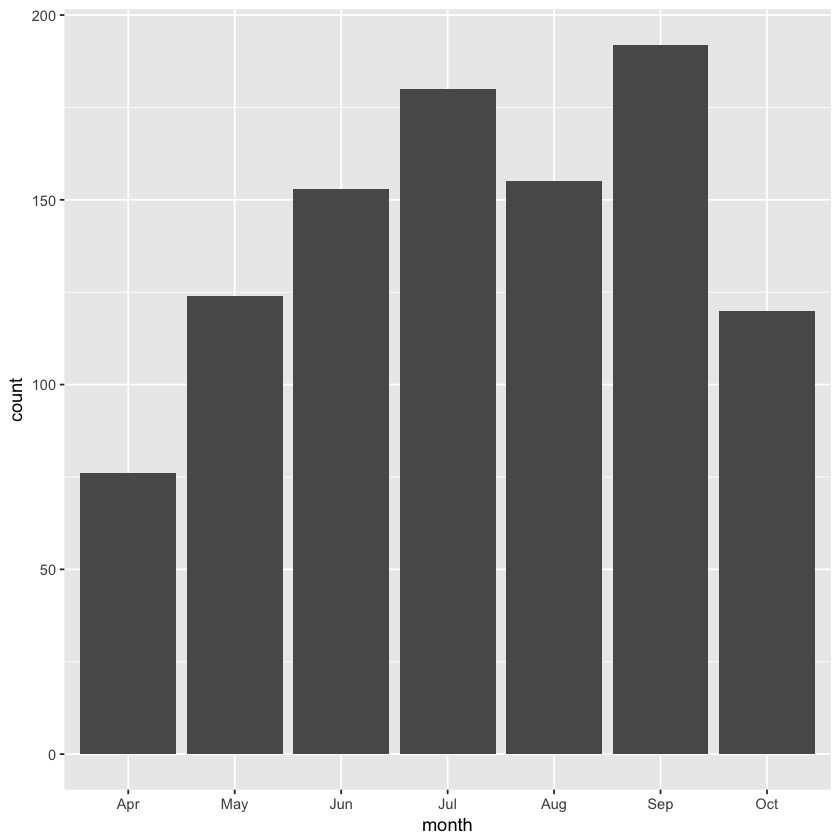

In [64]:
library(lubridate)
library(ggplot2)

twDf[["month"]] <- month(twDf$created, label = TRUE)
ggplot(twDf, aes(month)) + geom_bar()

### Some simple data exploration

- time of the day?


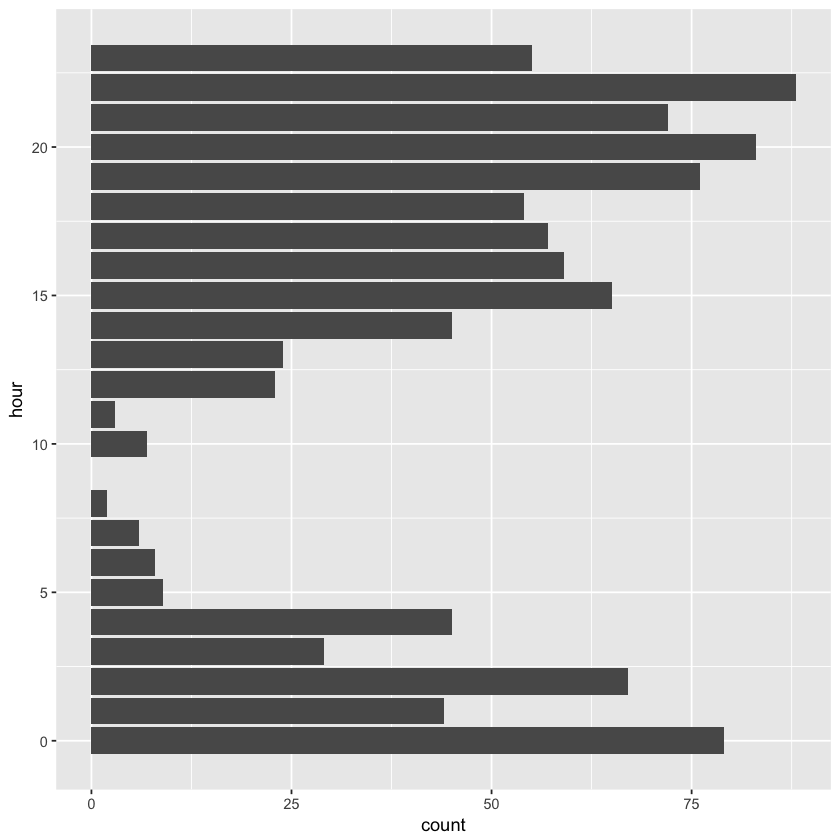

In [67]:
library(lubridate)
library(ggplot2)

twDf[["hour"]] <- hour(twDf[["created"]])
ggplot(twDf, aes(hour)) + geom_bar() + coord_flip()


## Get some user infomation using `lookupUsers()`

1. extract screen_names from retweeted accounts (30 most retweeted)
2. get the information of these accounts

In [69]:
rt_user_screen_names <- 
   str_replace(texts, "\\n", " ") %>% 
   str_replace("^RT\\s*@([[:alnum:]]+).+", "\\1") %>% 
   table %>% 
   sort(decreasing = T) %>% 
   head(30) %>% 
   names()
rt_user_screen_names
## FoxNews and foxandfriends are there...

[1] "realDonaldTrump" "VP"              "Scavino45"       "WhiteHouse"     
 [5] "FLOTUS"          "IvankaTrump"     "PressSec"        "SecShulkin"     
 [9] "SecretaryPerry"  "GOPLeader"       "USNavy"          "SBALinda"       
[13] "SecondLady"      "SecPriceMD"      "SHSanders45"     "StateDept"      
[17] "foxandfriends"   "FoxNews"         "marcorubio"      "netanyahu"      
[21] "TRUCKINGdotORG"  "fema"            "FLGovScott"      "ricardorossello"
[25] "SecretaryAcosta" "TomBossert45"    "AmbasciataUSA"   "AmericanLegion" 
[29] "ESAGovAffairs"   "GovAbbott"

## Get some user infomation using `lookupUsers()`

1. extract screen_names from retweeted accounts (30 most retweeted)
2. get the information of these accounts

In [70]:
library(stringi)
rt_user_information <- 
   lookupUsers(rt_user_screen_names) %>% 
   twListToDF()
rt_user_information <- rt_user_information %>% 
   mutate(description = stri_trans_general(description, "latin-ascii"))


## Check data

- Who has most followers?

In [9]:
rt_user_information %>% select(c("screenName", "followersCount")) %>%
  arrange(desc(followersCount))


screenName,followersCount
realDonaldTrump,40996784
NASA,26712586
FoxNews,16220441
WhiteHouse,15715928
FLOTUS,8736466
StateDept,4780381
IvankaTrump,4726903
VP,4720429
marcorubio,3151582
PressSec,2230210


## Check data

- Who has most tweets?

In [10]:
rt_user_information %>% 
  select(c("screenName", "statusesCount")) %>%
  arrange(desc(statusesCount))


screenName,statusesCount
FoxNews,337630
foxandfriends,73905
StateDept,50373
NASA,49210
realDonaldTrump,36172
ricardorossello,34395
USNavy,23760
IvankaTrump,13646
fema,13555
CENTCOM,10088


## Coming soon

* **Lab**: Working with Twitter data and text
* **Week 7**: Data visualization (in Python)
* Recommended: Read up on Python
* MY429: Quantitative Text Analysis